**Rock,Papaer,Scissor Project :**



In [2]:
#import the necessary libraries
import glob
from google.colab import drive
from tensorflow import keras
import tensorflow as tf
import os,datetime
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random


**Understanding DataSet:**

1.   This data-set will be loaded from tensorflow_datasets module
2.   The data-set contains images of people playing the rock, paper scissor games .It consist of 2,892 images having only train and test splits.
3. Each image has a shape of [300, 300, 3] with 3 output classes(i.e rock, scissor, paper).




In [4]:
#Loading the datase from tensorflow DataSets
df, dataset_info = tfds.load('rock_paper_scissors', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteLHWGG7/rock_paper_scissors-train.tfrec…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteLHWGG7/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [5]:
# Finding the Number of Samples of Train and Test split
num_train_samples = dataset_info.splits['train'].num_examples
num_test_samples = dataset_info.splits['test'].num_examples
num_classes = dataset_info.features['label'].num_classes

print('Number of TRAIN Images:', num_train_samples)
print('Number of TEST Images:', num_test_samples)
print('Number of label classes:', num_classes)

Number of TRAIN Images: 2520
Number of TEST Images: 372
Number of label classes: 3


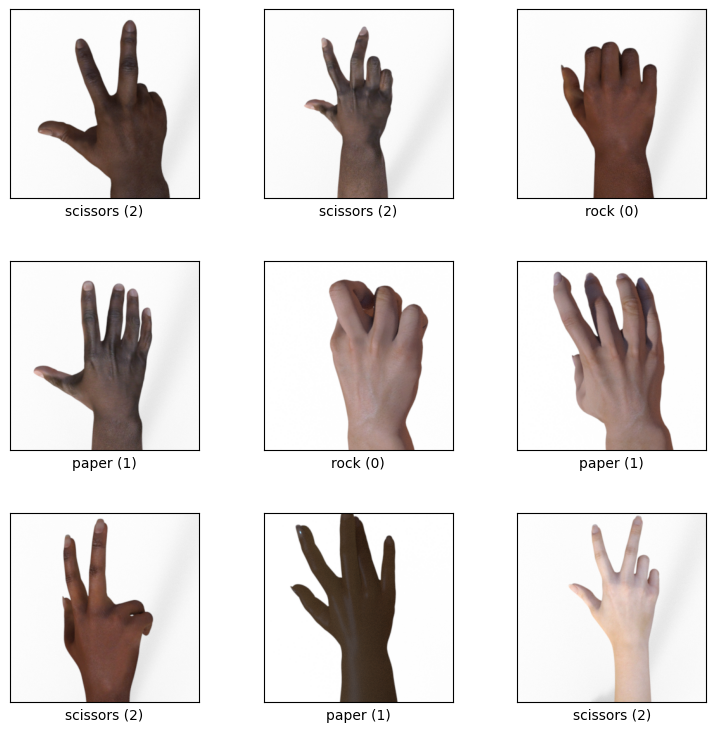

In [6]:
# Showing some of the images in this rock_paper_scissors dataset. 
# Here we can see that rock is represented by 0, paper by 1 and scissors by 2
train_data = df['train']
train_data
fig = tfds.show_examples(df['train'],dataset_info)

**Exploring DataSet:**

In [7]:
## Default images are labaled with 0,1,2.We are Converting label ID's[0,1,2] to string labels [rock,paper,scissor]
get_label_name = dataset_info.features['label'].int2str

def preview_dataset(dataset):
    plt.figure(figsize=(10, 10))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

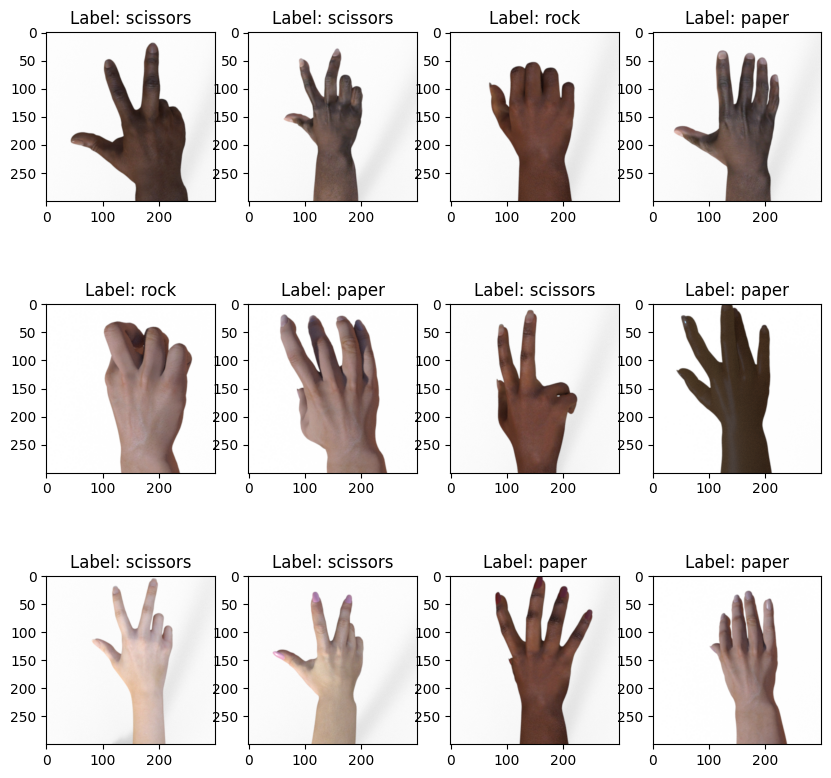

In [8]:
# Explore raw training dataset images.
preview_dataset(df['train'])

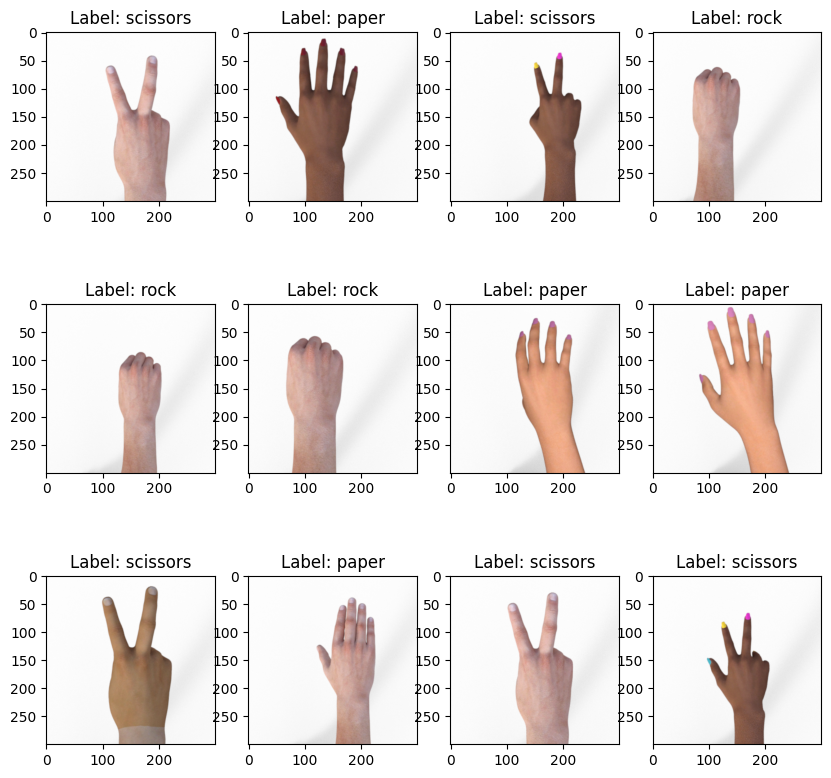

In [9]:
# Explore raw Test dataset images.
preview_dataset(df['test'])

In [10]:
# Explore what values are used to represent the image. 
first_image, first_lable = list(df['train'].take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (300, 300, 3) 

[[[254 254 254]
  [253 253 253]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [250 250 250]]

 [[254 254 254]
  [254 254 254]
  [253 253 253]
  ...
  [250 250 250]
  [251 251 251]
  [249 249 249]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [252 252 252]]

 ...

 [[252 252 252]
  [251 251 251]
  [252 252 252]
  ...
  [247 247 247]
  [249 249 249]
  [248 248 248]]

 [[253 253 253]
  [253 253 253]
  [251 251 251]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[252 252 252]
  [253 253 253]
  [252 252 252]
  ...
  [248 248 248]
  [247 247 247]
  [250 250 250]]]


**Data Preprocessing:**

1) we have just train and test split we need to get our validation split. We will use 10% of the train data as our validation split. 


In [11]:
#10 % of the train data as validation data
num_validation_images = int(0.1 * dataset_info.splits['train'].num_examples)
print(num_validation_images)

252


2) Before feeding our data into the CNN it will have to go through some form of preprocessing.

3) Each pixels of the image in our data-set ranges from 0 to 255 which we will scale to between 0 and 1.

In [12]:
def process_image(image, label):
    # Make image color values to be float.
    # tf.cast ensures that our images are of type float32
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    # Diving by 255. scales our pixel to between 0 and 1 in float format
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [150,150])
    return image, label

In [13]:
original_train_data=df['train']
original_test_data=df['test']
train_dataset = original_train_data.map(process_image)
test_dataset = original_test_data.map(process_image)

In [14]:
# Explore what values are used to represent the image. 
(first_image, first_lable) = list(train_dataset.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (150, 150, 3) 

[[[0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9813726  0.9813726  0.9813726 ]]

 ...

 [[0.9862745  0.9862745  0.9862745 ]
  [0.98725486 0.98725486 0.98725486]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.9705882  0.9705882  0.9705882 ]
  [0.97352946 0.97352946 0.97352946]
  [0.9754902  0.9754902  0.9754902 ]]

 [[0.9882353  0.9882353  0.9882353

In [ ]:
#tf.data.Dataset.skip(10):--> Create new Data Set skipping first 10 samples from the dataset.
#tf.data.Dataset.take(10): -->  Create new Data Set taking first 10 samples from the dataset.  

**Data shuffling and batching**

1.   We don't want our model to learn anything from the order or grouping of the images in the dataset.
2.   To avoid that we will shuffle the training examples. Also we're going to split the training set by batches to speed up training process and make it less memory consuming.


In [16]:
#Shuffle the data 
train_dataset = train_dataset.shuffle(1000)

#Taking 10 % of the train data as validation data
num_validation = int(0.1 * dataset_info.splits['train'].num_examples)
print('Number of Valiation images:', num_validation)

#Let's set out the validation data from the train data
validation_dataset = train_dataset.take(num_validation) # taking first 252 images
train_dataset = train_dataset.skip(num_validation) # skiping first 252 images

# Set no of bath size for test
num_test = int(dataset_info.splits['test'].num_examples)
#num_test = tf.cast(num_test, tf.int64) # converting to int
print("Number of Test images :",num_test)

Number of Valiation images: 252
Number of Test images : 372


In [17]:
#batching and prefetching
batch_size = 32
# Setting Batch size for all train ,test,validation images
train_images = train_dataset.batch(batch_size).prefetch(1)
validation_images = validation_dataset.batch(num_validation).prefetch(1)
test_images = test_dataset.batch(num_test).prefetch(1)

#Seperating labels and images
train_images, train_labels = next(iter(train_images))
valid_images, valid_labels = next(iter(validation_images))
test_images, test_labels = next(iter(test_images))

#Checking the shape
# Since batch size is 32 we are taking 32 samples for each iteration 
print("Shape of the image :",train_images.shape)
print("Training lables:",train_labels)

Shape of the image : (32, 150, 150, 3)
Training lables: tf.Tensor([2 2 1 1 2 1 1 1 2 0 1 2 1 2 1 0 2 1 2 1 1 2 2 0 0 1 2 2 0 0 2 1], shape=(32,), dtype=int64)


In [70]:
steps = int(train_images.shape[0] / 32)
steps

1

**Data Augmentation**
1.   One of the way to fight the model overfitting and to generalize the model to a broader set of examples is to augment the training data.
2.   As you saw from the previous section all training examples have a white background and vertically positioned right hands. But what if the image with the hand will be horizontally positioned or what if the background will not be that bright.

3. What if instead of a right hand the model will see a left hand. To make our model a little bit more universal we're going to flip and rotate images and also to adjust background colors.



In [64]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,  horizontal_flip=True)

augmented_train_data = datagen.flow(train_images, train_labels, batch_size=32)

**Building Model:**


In [65]:
#importing the necessary libraries
import tensorflow
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import numpy as np

In [66]:
model = tf.keras.models.Sequential()

# First convolution.
model.add(tf.keras.layers.Convolution2D(
    input_shape=[150, 150, 3],
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Second convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Third convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Fourth convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Flatten the results to feed into dense layers.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

# 512 neuron dense layer.
model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))

# Output layer.
#units=NUM_CLASSES,
model.add(tf.keras.layers.Dense(
    units=3,
    activation=tf.keras.activations.softmax
))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

**Compiling the model**


In [70]:
model.compile(optimizer= optimizers.Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**Training the model** 

In [71]:
# Preparing callbacks.
os.makedirs('logs/fit', exist_ok=True)
tensorboard_log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1
)

os.makedirs('tmp/checkpoints', exist_ok=True)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
)

In [72]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
training_history = model.fit(x=augmented_train_data, epochs = 24, validation_data = (valid_images, valid_labels), 
                    callbacks = [early_stopping_cb], steps_per_epoch=1, verbose=2)

Epoch 1/24
1/1 - 15s - loss: 1.1016 - accuracy: 0.4062 - val_loss: 1.9322 - val_accuracy: 0.2897 - 15s/epoch - 15s/step
Epoch 2/24
1/1 - 8s - loss: 1.2896 - accuracy: 0.5312 - val_loss: 1.1190 - val_accuracy: 0.3532 - 8s/epoch - 8s/step
Epoch 3/24
1/1 - 13s - loss: 1.0689 - accuracy: 0.4062 - val_loss: 1.0838 - val_accuracy: 0.4405 - 13s/epoch - 13s/step
Epoch 4/24
1/1 - 8s - loss: 1.0631 - accuracy: 0.4375 - val_loss: 1.1025 - val_accuracy: 0.3889 - 8s/epoch - 8s/step
Epoch 5/24
1/1 - 9s - loss: 1.0457 - accuracy: 0.4688 - val_loss: 1.1633 - val_accuracy: 0.3968 - 9s/epoch - 9s/step
Epoch 6/24
1/1 - 13s - loss: 1.0140 - accuracy: 0.5312 - val_loss: 1.2615 - val_accuracy: 0.4246 - 13s/epoch - 13s/step
Epoch 7/24
1/1 - 13s - loss: 1.0517 - accuracy: 0.4375 - val_loss: 1.1970 - val_accuracy: 0.4087 - 13s/epoch - 13s/step
Epoch 8/24
1/1 - 9s - loss: 1.0273 - accuracy: 0.5000 - val_loss: 1.1286 - val_accuracy: 0.3849 - 9s/epoch - 9s/step
Epoch 9/24
1/1 - 13s - loss: 1.0092 - accuracy: 0.56

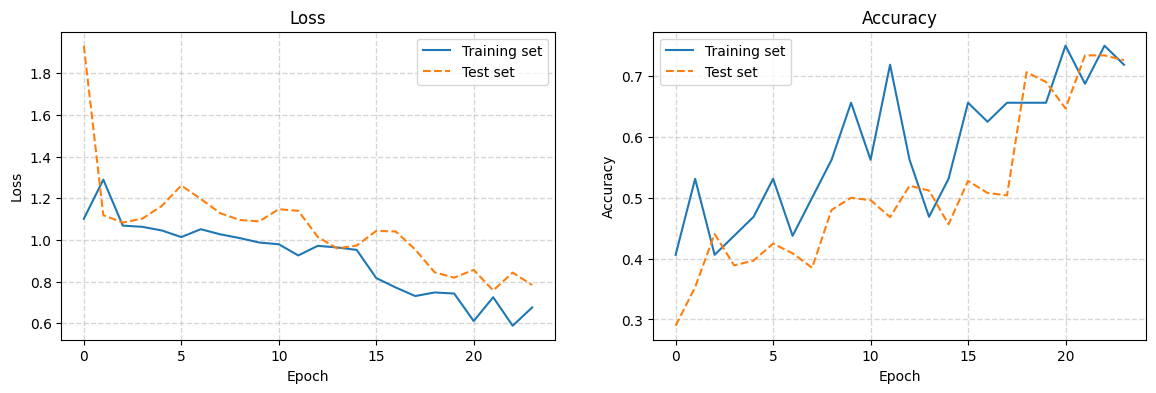

In [73]:
def evaluate_metrics(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

evaluate_metrics(training_history)

**Evaluate Performance of the Model**

In [74]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 8s 622ms/step - loss: 0.9705 - accuracy: 0.6747


[0.9705042839050293, 0.6747311949729919]

In [75]:
# %%capture 
train_loss, train_accuracy = model.evaluate(
    x=train_dataset.batch(32).take(2520)
)

test_loss, test_accuracy = model.evaluate(
    x=test_dataset.batch(32).take(372))

12/12 [==============================] - 9s 764ms/step - loss: 0.9705 - accuracy: 0.6747


In [76]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)
print('\n')
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

Training loss:  0.7760670185089111
Training accuracy:  0.7151675224304199


Test loss:  0.9705042839050293
Test accuracy:  0.6747311949729919


**Saving Model**

In [77]:
model_name = 'rock_paper_scissors_cnn.h5'
model.save(model_name, save_format='h5')

# Part2 - Loading Model

In [78]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('rock_paper_scissors_cnn.h5')

In [79]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 8s 619ms/step - loss: 0.9705 - accuracy: 0.6747


[0.9705042839050293, 0.6747311949729919]

**Taking Single Image and Making Predictions:**

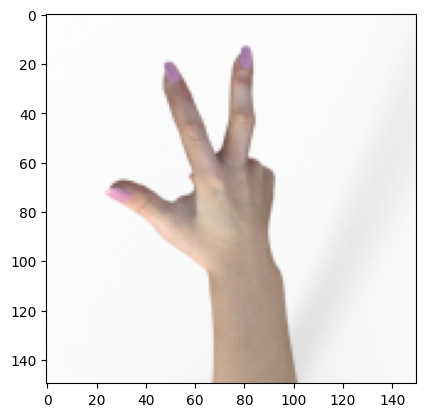

In [80]:
plt.imshow(train_images[0])

In [81]:
result = loaded_model.predict(np.array([train_images[0]]))
print(result)

1/1 [==============================] - 0s 133ms/step
[[0.09631863 0.44861954 0.45506182]]


In [82]:
predicted_value = np.argmax(result)
print(predicted_value)

2


so it predict scissor (i.e., 2) that is totally correct.